In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as scisig
import scipy.optimize as opt

In [68]:
PSDz_l = []
for i in range(1,10):
    filename = 'D:\\Experiment\\Cooling\\231109\\Calibration 2\\tt ('+str(i)+').mat'
    data = sio.loadmat(filename)
    Tint = data['Tinterval'][0][0]
    z = np.transpose(data['C'])[0]
    for i in range(5):
        PSDz = scisig.welch(z[i*10*int(1/Tint):(i+1)*10*int(1/Tint)], nperseg = int(1/Tint)/10, fs = int(1/Tint))
        PSDz_l.append(PSDz[1])
freq = PSDz[0]

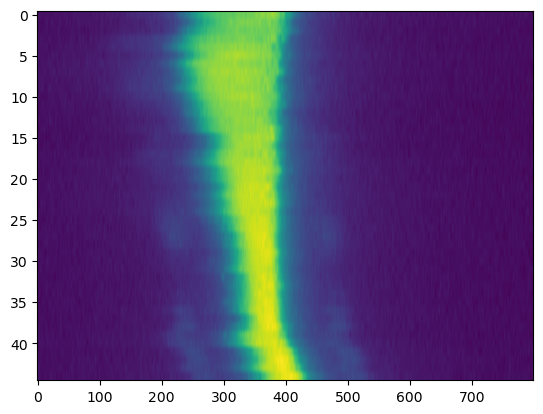

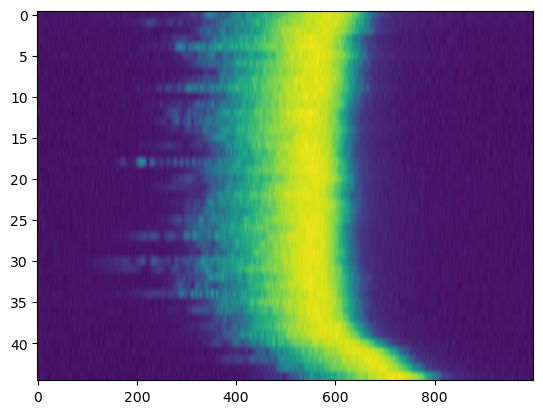

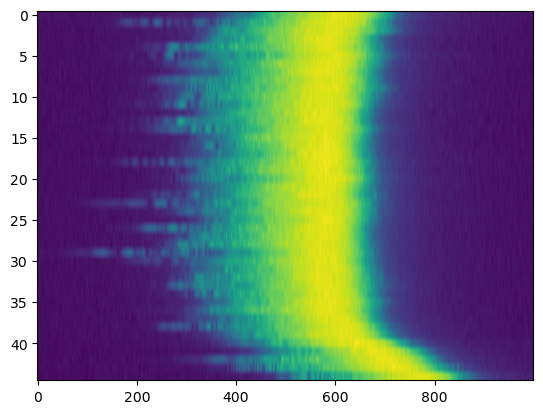

In [69]:
lb = 3800
ub = 4600
plt.imshow(np.log(np.array(PSDz_l)[:,lb:ub]), aspect = 'auto')
lb = 17000
ub = 18000
plt.figure()
plt.imshow(np.log(np.array(PSDz_l)[:,lb:ub]), aspect = 'auto')
lb = 19200
ub = 20200
plt.figure()
plt.imshow(np.log(np.array(PSDz_l)[:,lb:ub]), aspect = 'auto')

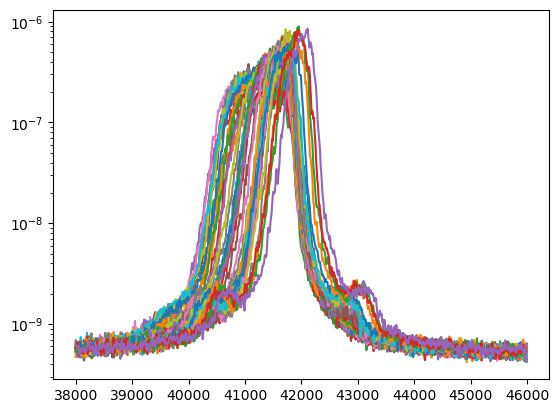

In [70]:
lb = 3800
ub = 4600
for i in PSDz_l:
    plt.plot(freq[lb:ub], i[lb:ub])

plt.yscale('log')

In [71]:
maxl = []
for i in PSDz_l:
    max = np.trapz(i[lb:ub], freq[lb:ub] - 60000*10**(-9))
    maxl.append(max)

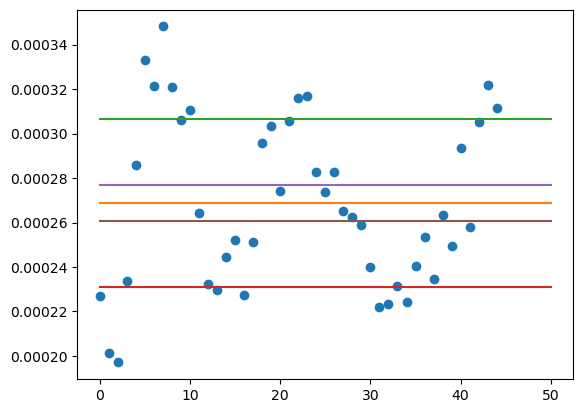

In [72]:
plt.plot(maxl,'o')
plt.plot([0, 50], [np.mean(maxl), np.mean(maxl)])
plt.plot([0, 50], [np.mean(maxl)+np.std(maxl), np.mean(maxl)+np.std(maxl)])
plt.plot([0, 50], [np.mean(maxl)-np.std(maxl), np.mean(maxl)-np.std(maxl)])

plt.plot([0, 50], [np.mean(maxl)*1.03, np.mean(maxl)*1.03])
plt.plot([0, 50], [np.mean(maxl)*0.97, np.mean(maxl)*0.97])

In [73]:
np.sqrt(sum(0.5*(np.array(maxl[1:])-np.array(maxl[:-1]))**2)/(len(maxl)-1))/np.mean(maxl)

0.06585402408172046

In [84]:
zl = []
for i in range(1,11):
    filename = 'D:\\Experiment\\Cooling\\231109\\Calibration 2\\tt ('+str(i)+').mat'
    data = sio.loadmat(filename)
    Tint = data['Tinterval'][0][0]
    z = np.transpose(data['C'])[0]
    zl.append(z)

In [85]:

errl = []
errl2 = []
errl3 = []
for t in [0.01, 0.1, 1, 10]:
    lb = int(38000/100)
    ub = int(46000/100)
    lb2 = int(170000/100)
    ub2 = int(180000/100)
    lb3 = int(192000/100)
    ub3 = int(202000/100)
    maxl = []
    maxl2 = []
    maxl3 = []
    for z in zl:
        for i in range(int(50/t)):
            PSDz = scisig.welch(z[int(i*t*1/Tint):int((i+1)*t*1/Tint)], nperseg = int(1/Tint)/100, fs = int(1/Tint))
            max = np.trapz(PSDz[1][lb:ub], PSDz[0][lb:ub])
            maxl.append(max)
            max2 = np.trapz(PSDz[1][lb2:ub2], PSDz[0][lb2:ub2])
            maxl2.append(max2)
            max3 = np.trapz(PSDz[1][lb3:ub3], PSDz[0][lb3:ub3])
            maxl3.append(max3)
    err = np.sqrt(sum(0.5*(np.array(maxl[1:])-np.array(maxl[:-1]))**2)/(len(maxl)-1))/np.mean(maxl)
    errl.append(err)
    err2 = np.sqrt(sum(0.5*(np.array(maxl2[1:])-np.array(maxl2[:-1]))**2)/(len(maxl2)-1))/np.mean(maxl2)
    errl2.append(err2)
    err3 = np.sqrt(sum(0.5*(np.array(maxl3[1:])-np.array(maxl3[:-1]))**2)/(len(maxl3)-1))/np.mean(maxl3)
    errl3.append(err3)

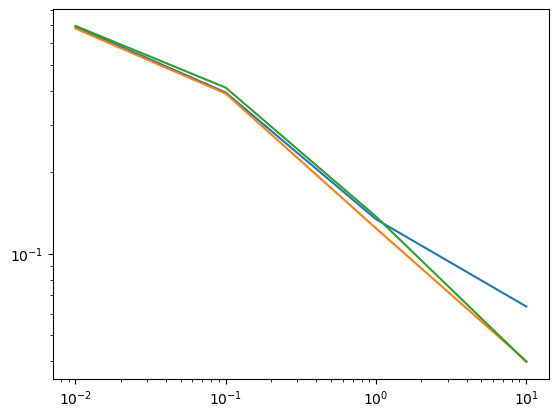

In [86]:
plt.plot([0.01, 0.1, 1, 10], errl)
plt.plot([0.01, 0.1, 1, 10], errl2)
plt.plot([0.01, 0.1, 1, 10], errl3)
plt.xscale('log')
plt.yscale('log')

In [79]:
errl3

[0.42113908795334976,
 0.23493041552517746,
 0.08577430119276547,
 0.05010993158944928]